### <font color='red'> Project 3 : Buzz Prediction on Twitter

Project Description:
- Use same datasets as Project 2.
- Run all the models only on 10% data. Use code given in Project 2 for sampling.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply four voting classifiers - two with hard voting and two with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project3_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project3_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project3_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Twitter-Absolute-Sigma-500.data',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140707 entries, 0 to 140706
Data columns (total 78 columns):
0     140707 non-null int64
1     140707 non-null int64
2     140707 non-null int64
3     140707 non-null int64
4     140707 non-null int64
5     140707 non-null int64
6     140707 non-null int64
7     140707 non-null int64
8     140707 non-null int64
9     140707 non-null int64
10    140707 non-null int64
11    140707 non-null int64
12    140707 non-null int64
13    140707 non-null int64
14    140707 non-null float64
15    140707 non-null float64
16    140707 non-null float64
17    140707 non-null float64
18    140707 non-null float64
19    140707 non-null float64
20    140707 non-null float64
21    140707 non-null float64
22    140707 non-null float64
23    140707 non-null float64
24    140707 non-null float64
25    140707 non-null float64
26    140707 non-null float64
27    140707 non-null float64
28    140707 non-null int64
29    140707 non-null int64
30    140707 non-null

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
count,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,...,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000
mean,172.279823,155.150625,165.464476,176.820549,186.937700,216.209208,243.866510,87.050154,78.639236,84.269574,...,1.113444,1.196131,172.838807,155.630878,165.938674,177.314810,187.463794,216.776294,244.479194,0.197396
std,509.872276,471.573236,495.360236,528.351277,560.331281,632.188378,707.402192,234.731748,218.448179,233.536510,...,1.374287,1.826150,510.937549,472.462733,496.233557,529.286514,561.309487,633.203935,708.436795,0.398035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,6.000000,0.000000
50%,22.000000,19.000000,20.000000,22.000000,23.000000,28.000000,33.000000,13.000000,11.000000,13.000000,...,1.000000,1.000000,22.000000,19.000000,21.000000,22.000000,23.000000,28.000000,33.000000,0.000000
75%,125.000000,112.000000,119.000000,126.000000,133.000000,161.000000,186.000000,70.000000,64.000000,67.000000,...,1.100000,1.119048,126.000000,113.000000,119.000000,127.000000,134.000000,162.000000,187.000000,0.000000
max,24210.000000,22899.000000,20495.000000,27007.000000,30957.000000,28603.000000,37505.000000,15105.000000,15730.000000,16389.000000,...,185.666672,295.000000,24301.000000,22980.000000,20495.000000,27071.000000,31028.000000,28697.000000,37505.000000,1.000000


In [115]:
df_sample = df.sample(frac=0.1, random_state=0)

In [116]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
scaler = MinMaxScaler()

In [118]:
scaler.fit(df_sample)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [119]:
scaler.fit_transform(df_sample)

array([[5.30547957e-03, 5.29023842e-03, 5.69494883e-03, ...,
        4.24520292e-03, 4.97449783e-03, 0.00000000e+00],
       [2.30456769e-02, 6.08739764e-03, 9.98679432e-03, ...,
        7.75457067e-03, 1.41678736e-02, 1.00000000e+00],
       [1.13570422e-02, 8.69628234e-03, 1.34532849e-02, ...,
        9.33944643e-03, 7.99697752e-03, 0.00000000e+00],
       ...,
       [0.00000000e+00, 7.24690195e-05, 0.00000000e+00, ...,
        2.83013528e-04, 6.29683269e-05, 0.00000000e+00],
       [7.46083064e-03, 5.29023842e-03, 7.92340707e-03, ...,
        7.07533820e-03, 6.17089604e-03, 0.00000000e+00],
       [0.00000000e+00, 1.44938039e-04, 0.00000000e+00, ...,
        0.00000000e+00, 1.25936654e-04, 0.00000000e+00]])

In [120]:
df_sample=scaler.fit_transform(df_sample)

In [121]:
df_sample

array([[5.30547957e-03, 5.29023842e-03, 5.69494883e-03, ...,
        4.24520292e-03, 4.97449783e-03, 0.00000000e+00],
       [2.30456769e-02, 6.08739764e-03, 9.98679432e-03, ...,
        7.75457067e-03, 1.41678736e-02, 1.00000000e+00],
       [1.13570422e-02, 8.69628234e-03, 1.34532849e-02, ...,
        9.33944643e-03, 7.99697752e-03, 0.00000000e+00],
       ...,
       [0.00000000e+00, 7.24690195e-05, 0.00000000e+00, ...,
        2.83013528e-04, 6.29683269e-05, 0.00000000e+00],
       [7.46083064e-03, 5.29023842e-03, 7.92340707e-03, ...,
        7.07533820e-03, 6.17089604e-03, 0.00000000e+00],
       [0.00000000e+00, 1.44938039e-04, 0.00000000e+00, ...,
        0.00000000e+00, 1.25936654e-04, 0.00000000e+00]])

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X = df_sample
y = X[:,77]
X = X[:,:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

# Hard Voting

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [16]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
knn_reg = KNeighborsClassifier(4)
knn_reg.fit(X_train, y_train)
svm_reg = SVC(C = 5, probability = True)
svm_reg.fit(X_train, y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn_reg), ('svc', svm_reg)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_reg, knn_reg, svm_reg, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.925531914893617
KNeighborsClassifier 0.950354609929078
SVC 0.9078014184397163
VotingClassifier 0.925531914893617


In [18]:
y_pred_hvote = voting_clf.predict(X_test)

In [19]:
print(confusion_matrix(y_test, y_pred_hvote))
print(classification_report(y_test, y_pred_hvote))

[[212   2]
 [ 19  49]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       214
         1.0       0.96      0.72      0.82        68

   micro avg       0.93      0.93      0.93       282
   macro avg       0.94      0.86      0.89       282
weighted avg       0.93      0.93      0.92       282



# Soft Voting

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
knn_reg = KNeighborsClassifier(4)
knn_reg.fit(X_train, y_train)
svm_reg = SVC(C = 5, probability = True)
svm_reg.fit(X_train, y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [22]:
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn_reg), ('svc', svm_reg)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_reg, knn_reg, svm_reg, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.925531914893617
KNeighborsClassifier 0.950354609929078
SVC 0.9078014184397163
VotingClassifier 0.9574468085106383


In [23]:
y_pred_svote = voting_clf.predict(X_test)

In [24]:
print(confusion_matrix(y_test, y_pred_svote))
print(classification_report(y_test, y_pred_svote))

[[211   3]
 [  9  59]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       214
         1.0       0.95      0.87      0.91        68

   micro avg       0.96      0.96      0.96       282
   macro avg       0.96      0.93      0.94       282
weighted avg       0.96      0.96      0.96       282



# Bagging - SVC Linear

In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC

In [26]:
svc_linear = LinearSVC(random_state=3)
bag_linsvc = BaggingClassifier(svc_linear, n_estimators=400, max_samples=100, bootstrap=True, n_jobs=-1, random_state=30)

In [27]:
bag_linsvc.fit(X_train, y_train)
y_bag_linsvc_pred = bag_linsvc.predict(X_test)

In [28]:
print('Train score: {:.2f}'.format(bag_linsvc.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_linsvc.score(X_test, y_test)))

Train score: 0.96
Test score: 0.95


In [29]:
y_pred_svcl=bag_linsvc.predict(X_test)

In [30]:
print(confusion_matrix(y_test, y_pred_svcl))
print(classification_report(y_test, y_pred_svcl))

[[211   3]
 [ 10  58]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       214
         1.0       0.95      0.85      0.90        68

   micro avg       0.95      0.95      0.95       282
   macro avg       0.95      0.92      0.93       282
weighted avg       0.95      0.95      0.95       282



# Bagging - Decision Tree Classifier

In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtree = DecisionTreeClassifier(random_state=3)
bag_dtree = BaggingClassifier(dtree, n_estimators=400, max_samples=100, bootstrap=True, n_jobs=-1, random_state=30)
bag_dtree.fit(X_train, y_train)
y_bag_dtree_pred = bag_dtree.predict(X_test)

In [33]:
print('Train score: {:.2f}'.format(bag_dtree.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_dtree.score(X_test, y_test)))

Train score: 0.97
Test score: 0.97


In [34]:
y_pred_bag_dtree=bag_dtree.predict(X_test)

In [35]:
print(confusion_matrix(y_test, y_pred_bag_dtree))
print(classification_report(y_test, y_pred_bag_dtree))

[[210   4]
 [  4  64]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       214
         1.0       0.94      0.94      0.94        68

   micro avg       0.97      0.97      0.97       282
   macro avg       0.96      0.96      0.96       282
weighted avg       0.97      0.97      0.97       282



# Pasting - SVC Linear

In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC

In [37]:
svc_lin = LinearSVC(random_state=30)
bag_linsvc = BaggingClassifier(svc_lin, n_estimators=400, max_samples=100, bootstrap=False, n_jobs=-1, random_state=30)
bag_linsvc.fit(X_train, y_train)
y_bag_linsvc_pred = bag_linsvc.predict(X_test)

In [38]:
print('Train score: {:.2f}'.format(bag_linsvc.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_linsvc.score(X_test, y_test)))

Train score: 0.96
Test score: 0.95


In [39]:
y_pred_bag_LS=bag_linsvc.predict(X_test)

In [40]:
print(confusion_matrix(y_test, y_pred_bag_LS))
print(classification_report(y_test, y_pred_bag_LS))

[[211   3]
 [ 10  58]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       214
         1.0       0.95      0.85      0.90        68

   micro avg       0.95      0.95      0.95       282
   macro avg       0.95      0.92      0.93       282
weighted avg       0.95      0.95      0.95       282



 # Pasting - Decision Tree Classifier

In [41]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [42]:
dtc = DecisionTreeClassifier(random_state=30)
bag_dtc = BaggingClassifier(dtc, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=30)

In [43]:
bag_dtc.fit(X_train, y_train)
y_bag_dtc_pred = bag_dtc.predict(X_test)

print('Train score: {:.2f}'.format(bag_dtc.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_dtc.score(X_test, y_test)))

Train score: 0.97
Test score: 0.98


In [44]:
y_pred_past_dt = bag_dtc.predict(X_test)

In [45]:
print(confusion_matrix(y_test, y_pred_past_dt))
print(classification_report(y_test, y_pred_past_dt))

[[209   5]
 [  2  66]]
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       214
         1.0       0.93      0.97      0.95        68

   micro avg       0.98      0.98      0.98       282
   macro avg       0.96      0.97      0.97       282
weighted avg       0.98      0.98      0.98       282



# Ada Boosting - Decistion Tree

In [46]:
from sklearn.ensemble import AdaBoostClassifier
ada_dtc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.6, random_state=30)
ada_dtc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.6, n_estimators=200, random_state=30)

In [47]:
print('Train score: {:.2f}'.format(ada_dtc.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_dtc.score(X_test, y_test)))

Train score: 1.00
Test score: 0.96


In [48]:
y_pred_ada_dt=ada_dtc.predict(X_test)

In [49]:
print(confusion_matrix(y_test, y_pred_ada_dt))
print(classification_report(y_test, y_pred_ada_dt))

[[208   6]
 [  5  63]]
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       214
         1.0       0.91      0.93      0.92        68

   micro avg       0.96      0.96      0.96       282
   macro avg       0.94      0.95      0.95       282
weighted avg       0.96      0.96      0.96       282



# Ada Boosting - Logistic Model

In [50]:
from sklearn import linear_model

log_reg = linear_model.LogisticRegression()

ada_log = AdaBoostClassifier(log_reg, n_estimators=100, algorithm="SAMME.R", learning_rate=0.6, random_state=30)
ada_log.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          learning_rate=0.6, n_estimators=100, random_state=30)

In [51]:
print('Train score: {:.3f}'.format(ada_log.score(X_train, y_train)))
print('Test score: {:.3f}'.format(ada_log.score(X_test, y_test)))

Train score: 0.905
Test score: 0.869


In [52]:
y_pred_ada_log=ada_log.predict(X_test)

In [53]:
print(confusion_matrix(y_test, y_pred_ada_log))
print(classification_report(y_test, y_pred_ada_log))

[[213   1]
 [ 36  32]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       214
         1.0       0.97      0.47      0.63        68

   micro avg       0.87      0.87      0.87       282
   macro avg       0.91      0.73      0.78       282
weighted avg       0.88      0.87      0.85       282



# Gradient Boosting

In [54]:
from  sklearn.ensemble import GradientBoostingClassifier

In [55]:
grad_boost = GradientBoostingClassifier(max_depth=2, n_estimators=2, learning_rate=1.0, random_state=42)
grad_boost.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=2,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [56]:
print('Train score: {:.3f}'.format(grad_boost.score(X_train, y_train)))
print('Test score: {:.3f}'.format(grad_boost.score(X_test, y_test)))

Train score: 0.975
Test score: 0.975


In [57]:
y_pred_grd_bst=grad_boost.predict(X_test)

In [58]:
print(confusion_matrix(y_test, y_pred_grd_bst))
print(classification_report(y_test, y_pred_grd_bst))

[[212   2]
 [  5  63]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       214
         1.0       0.97      0.93      0.95        68

   micro avg       0.98      0.98      0.98       282
   macro avg       0.97      0.96      0.97       282
weighted avg       0.98      0.98      0.97       282



# Dimensionality Reduction using PCA

In [59]:
from sklearn.decomposition import PCA
pca = PCA()

In [60]:
pca.fit(X_train)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_*100, decimals=1))

In [61]:
pca_obj = PCA(n_components = 0.95)
X_pca_train = pca_obj.fit_transform(X_train)
X_pca_test=pca_obj.transform(X_test)

# KNN Classifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn_para = {'n_neighbors':range(3,12)}
knn_grid_search = GridSearchCV(KNeighborsClassifier(),knn_para,cv=5,return_train_score=True)
knn_grid_search.fit(X_pca_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(3, 12)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

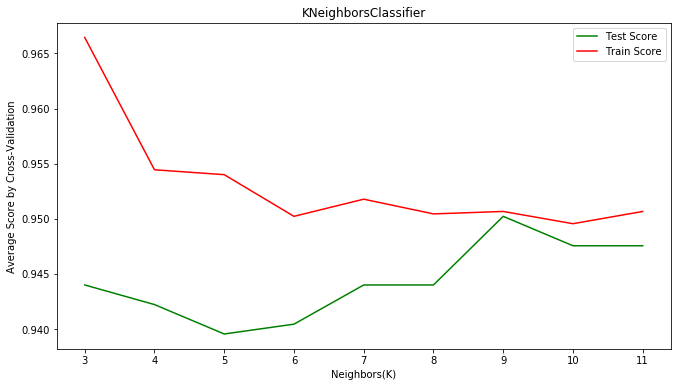

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
neighbors = [dict['n_neighbors'] for dict in knn_grid_search.cv_results_['params']]
plt.figure(figsize=(11,6))
plt.plot(neighbors, knn_grid_search.cv_results_['mean_test_score'],label = 'Test Score',c = 'g')
plt.plot(neighbors, knn_grid_search.cv_results_['mean_train_score'],label = 'Train Score', c = 'r')
plt.xlabel('Neighbors(K)')
plt.ylabel('Average Score by Cross-Validation')
plt.title('KNeighborsClassifier')
plt.legend()

In [64]:
knn_train_score = knn_grid_search.score(X_pca_train,y_train)
knn_test_score = knn_grid_search.score(X_pca_test,y_test)

In [65]:
knn_report = [['KNeighborsClassifier',knn_grid_search.best_params_,knn_train_score,knn_test_score]]
pd.DataFrame(knn_report,columns=['Classification Task', 'Parameter','Train Score', 'Test Score'])

,Classification Task,Parameter,Train Score,Test Score
0,KNeighborsClassifier,{'n_neighbors': 9},0.949333,0.932624


In [66]:
knn = KNeighborsClassifier(3)
knn.fit(X_pca_train, y_train)
y_pred_knn = knn.predict(X_pca_test)

In [67]:
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[210   4]
 [  6  62]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       214
         1.0       0.94      0.91      0.93        68

   micro avg       0.96      0.96      0.96       282
   macro avg       0.96      0.95      0.95       282
weighted avg       0.96      0.96      0.96       282



# Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

c_in = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_in:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_pca_train, y_train)
    log_l2.fit(X_pca_train, y_train)
    train_score_l1.append(log_l1.score(X_pca_train, y_train))
    train_score_l2.append(log_l2.score(X_pca_train, y_train))
    test_score_l1.append(log_l1.score(X_pca_test, y_test))
    test_score_l2.append(log_l2.score(X_pca_test, y_test))

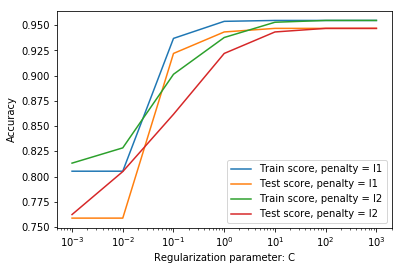

In [69]:
%matplotlib inline

plt.plot(c_in, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_in, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_in, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_in, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [70]:
knn_report = [['Logistic Regression',knn_grid_search.best_params_,knn_train_score,knn_test_score]]
titles = ['Classification Task', 'Parameter','Train Score', 'Test Score']
pd.DataFrame(knn_report,columns=titles)

print('Train score for l1: {:.4f}'.format(log_l1.score(X_pca_train, y_train)))
print('Test score for l1: {:.4f}'.format(log_l1.score(X_pca_test, y_test)))

print('Train score for l2: {:.4f}'.format(log_l2.score(X_pca_train, y_train)))
print('Test score for l2: {:.4f}'.format(log_l2.score(X_pca_test, y_test)))

Train score for l1: 0.9547
Test score for l1: 0.9468
Train score for l2: 0.9547
Test score for l2: 0.9468


In [71]:
l1_report = [['Logistic Regression L1',10,log_l1.score(X_pca_train, y_train),log_l1.score(X_pca_test, y_test)]]
l2_report = [['Logistic Regression L2',1,log_l2.score(X_pca_train, y_train),log_l2.score(X_pca_test, y_test)]]

In [72]:
pd.DataFrame(l1_report,columns=['Classification Task', 'Parameter','Train Score', 'Test Score'])

,Classification Task,Parameter,Train Score,Test Score
0,Logistic Regression L1,10,0.954667,0.946809


In [73]:
pd.DataFrame(l2_report,columns=['Classification Task', 'Parameter','Train Score', 'Test Score'])

,Classification Task,Parameter,Train Score,Test Score
0,Logistic Regression L2,1,0.954667,0.946809


In [74]:
y_pred_logist_l1 = log_l1.predict(X_pca_test)
confusion_matrix(y_test, y_pred_logist_l1)

array([[211,   3],
       [ 12,  56]], dtype=int64)

In [75]:
y_pred_logist_l2 = log_l2.predict(X_pca_test)
confusion_matrix(y_test, y_pred_logist_l2)

array([[211,   3],
       [ 12,  56]], dtype=int64)

In [76]:
print(classification_report(y_test, y_pred_logist_l1))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       214
         1.0       0.95      0.82      0.88        68

   micro avg       0.95      0.95      0.95       282
   macro avg       0.95      0.90      0.92       282
weighted avg       0.95      0.95      0.95       282



In [77]:
print(classification_report(y_test, y_pred_logist_l2))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       214
         1.0       0.95      0.82      0.88        68

   micro avg       0.95      0.95      0.95       282
   macro avg       0.95      0.90      0.92       282
weighted avg       0.95      0.95      0.95       282



# SVC Linear

In [78]:
from sklearn.svm import LinearSVC

linsvc = LinearSVC().fit(X_train, y_train)
print("Coefficient shape- ", linsvc.coef_.shape)
print("Intercept shape- ", linsvc.intercept_.shape)

Coefficient shape-  (1, 77)
Intercept shape-  (1,)


In [79]:
from sklearn.model_selection import GridSearchCV
linsvc_para = {'C':[0.01,0.1,1,10]}
linsvc_grid_search = GridSearchCV(LinearSVC(),linsvc_para,cv=3,return_train_score=True)
linsvc_grid_search.fit(X_pca_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [80]:
linsvc_train_score = linsvc_grid_search.score(X_pca_train,y_train)
linsvc_test_score = linsvc_grid_search.score(X_pca_test,y_test)
linsvc_params = linsvc_grid_search.best_params_
linsvc_report = [['Linear SVC',linsvc_params,linsvc_train_score,linsvc_test_score]]
pd.DataFrame(linsvc_report,columns=['Classification Task', 'Parameter','Train Score', 'Test Score'])

,Classification Task,Parameter,Train Score,Test Score
0,Linear SVC,{'C': 1},0.953778,0.943262


In [82]:
y_pred_svc = linsvc_grid_search.predict(X_pca_test)

In [83]:
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

[[211   3]
 [ 13  55]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       214
         1.0       0.95      0.81      0.87        68

   micro avg       0.94      0.94      0.94       282
   macro avg       0.95      0.90      0.92       282
weighted avg       0.94      0.94      0.94       282



In [84]:
print('Train score for SVC: {:.4f}'.format(linsvc_grid_search.score(X_pca_train, y_train)))
print('Test score for SVC: {:.4f}'.format(linsvc_grid_search.score(X_pca_test, y_test)))

Train score for SVC: 0.9538
Test score for SVC: 0.9433


# SVC_RBF

In [85]:
from sklearn import svm
from sklearn.svm import SVC

rbfsvc_param = {'gamma':[0.01,0.1,1,10],'C':[0.01,0.1,1,10]}

rbfsvc_grid_search = GridSearchCV(svm.SVC(kernel='rbf'),rbfsvc_param,cv=5,return_train_score=True)
rbfsvc_grid_search.fit(X_pca_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [0.01, 0.1, 1, 10], 'C': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [86]:
rbfsvc_train_score = rbfsvc_grid_search.score(X_pca_train,y_train)
rbfsvc_test_score = rbfsvc_grid_search.score(X_pca_test,y_test)
rbfsvc_params = rbfsvc_grid_search.best_params_

rbfsvc_report = [['RBF SVC',rbfsvc_params,rbfsvc_train_score,rbfsvc_test_score]]
pd.DataFrame(rbfsvc_report,columns=['Classification Task', 'Parameter','Train Score', 'Test Score'])

,Classification Task,Parameter,Train Score,Test Score
0,RBF SVC,"{'C': 10, 'gamma': 1}",0.956444,0.953901


In [88]:
y_pred_svcrbf = rbfsvc_grid_search.predict(X_pca_test)

In [90]:
print(confusion_matrix(y_test, y_pred_svcrbf))
print(classification_report(y_test, y_pred_svcrbf))

[[211   3]
 [ 10  58]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       214
         1.0       0.95      0.85      0.90        68

   micro avg       0.95      0.95      0.95       282
   macro avg       0.95      0.92      0.93       282
weighted avg       0.95      0.95      0.95       282



In [91]:
print('Train score for SVC: {:.4f}'.format(rbfsvc_grid_search.score(X_pca_train, y_train)))
print('Test score for SVC: {:.4f}'.format(rbfsvc_grid_search.score(X_pca_test, y_test)))

Train score for SVC: 0.9564
Test score for SVC: 0.9539


# SVC_POLY

In [92]:
polysvc_param={'C':[0.01,0.1,1,10], 'gamma':[0.01,0.1,1,10], 'degree':[2,3]}
polysvc_grid_search = GridSearchCV(svm.SVC(kernel='poly'),polysvc_param,cv=5,return_train_score=True)
polysvc_grid_search.fit(X_pca_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10], 'degree': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [93]:
y_pred_svcpoly = polysvc_grid_search.predict(X_pca_test)
polysvc_train_score = polysvc_grid_search.score(X_pca_train,y_train)
polysvc_test_score = polysvc_grid_search.score(X_pca_test,y_test)
polysvc_params = polysvc_grid_search.best_params_
polysvc_report = [['POLY SVC',polysvc_params,polysvc_train_score,polysvc_test_score]]
pd.DataFrame(polysvc_report,columns=['Classification Task', 'Parameter','Train Score', 'Test Score'])

,Classification Task,Parameter,Train Score,Test Score
0,POLY SVC,"{'C': 0.1, 'degree': 3, 'gamma': 10}",0.952889,0.939716


In [95]:
y_pred_svcpoly = polysvc_grid_search.predict(X_pca_test)

In [96]:
print(confusion_matrix(y_test, y_pred_svcpoly))
print(classification_report(y_test, y_pred_svcpoly))

[[210   4]
 [ 13  55]]
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       214
         1.0       0.93      0.81      0.87        68

   micro avg       0.94      0.94      0.94       282
   macro avg       0.94      0.90      0.91       282
weighted avg       0.94      0.94      0.94       282



In [97]:
print('Train score for SVC: {:.4f}'.format(polysvc_grid_search.score(X_pca_train, y_train)))
print('Test score for SVC: {:.4f}'.format(polysvc_grid_search.score(X_pca_test, y_test)))

Train score for SVC: 0.9529
Test score for SVC: 0.9397


# Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier
dec_para = {'max_depth':[1,2,3,4,5,6,7,8,9]}

In [104]:
dec_grid_search = GridSearchCV(DecisionTreeClassifier(),dec_para,cv=5,return_train_score=True)
dec_grid_search.fit(X_pca_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [105]:
dec_train_score = dec_grid_search.score(X_pca_train,y_train)
dec_test_score = dec_grid_search.score(X_pca_test,y_test)
dec_params = dec_grid_search.best_params_

dec_report = [['DECISION TREE',dec_params,dec_train_score,dec_test_score]]
pd.DataFrame(dec_report,columns=['Classification Task', 'Parameter','Train Score', 'Test Score'])

,Classification Task,Parameter,Train Score,Test Score
0,DECISION TREE,{'max_depth': 2},0.952,0.93617


In [106]:
y_pred_DT = dec_grid_search.predict(X_pca_test)

In [107]:
print(confusion_matrix(y_test, y_pred_DT))
print(classification_report(y_test, y_pred_DT))

[[208   6]
 [ 12  56]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       214
         1.0       0.90      0.82      0.86        68

   micro avg       0.94      0.94      0.94       282
   macro avg       0.92      0.90      0.91       282
weighted avg       0.94      0.94      0.94       282



In [109]:
print('Train score for SVC: {:.4f}'.format(dec_grid_search.score(X_pca_train, y_train)))
print('Test score for SVC: {:.4f}'.format(dec_grid_search.score(X_pca_test, y_test)))

Train score for SVC: 0.9520
Test score for SVC: 0.9362


# Final Report with PCA

In [110]:
from IPython.display import display, HTML
pd.options.display.float_format = '{:.4f}'.format

final_report = pd.DataFrame(knn_report+dec_report+linsvc_report+polysvc_report+l1_report+l2_report,columns=['Regression Task', 'Parameter','Train Score', 'Test Score'])
final_report

,Regression Task,Parameter,Train Score,Test Score
0,Logistic Regression,{'n_neighbors': 9},0.9493,0.9326
1,DECISION TREE,{'max_depth': 2},0.9520,0.9362
2,Linear SVC,{'C': 1},0.9538,0.9433
3,POLY SVC,"{'C': 0.1, 'degree': 3, 'gamma': 10}",0.9529,0.9397
4,Logistic Regression L1,10,0.9547,0.9468
5,Logistic Regression L2,1,0.9547,0.9468


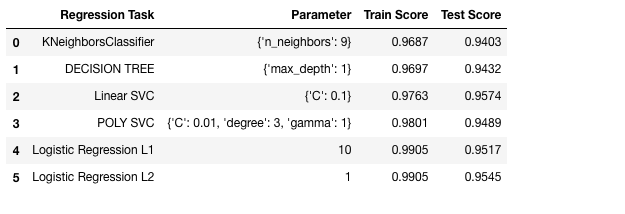

# Neural - Deep Learning

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(12, input_dim=77, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_clf = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5, scoring = 'accuracy')

grid_clf.fit(X_train, y_train)
print(grid_clf.best_score_)
print(grid_clf.best_params_)